In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
from IPython.core.display import display, HTML

In [2]:
# display 설정
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
# 한글 폰트 설정
path= 'c:/Windows/Fonts/malgun.ttf'
font_name= font_manager.FontProperties(fname= path).get_name()
plt.rcParams['font.family']= font_name

In [4]:
path= 'c:/Users/soohan/bigcontest/dataset/BIGCON_DATA_ver1.2'

In [5]:
with open(path+'/CJ_DATA.bin', 'rb') as f:
    cj = pickle.load(f)

with open(path+'/GS_DATA.bin', 'rb') as f:
    gs = pickle.load(f)
    
with open(path+'/SH_DATA.bin', 'rb') as f:
    sh = pickle.load(f)
    
with open(path+'/SK_DATA.bin', 'rb') as f:
    sk = pickle.load(f)
    
with open(path+'/WS_DATA.bin', 'rb') as f:
    ws = pickle.load(f)

In [6]:
print(cj.keys())
print('-'*80)
print(gs.keys())
print('-'*80)
print(sh.keys())
print('-'*80)
print(sk.keys())
print('-'*80)
print(ws.keys())

dict_keys(['CJ_DATA', 'ITEM_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
--------------------------------------------------------------------------------
dict_keys(['GS_TOTAL', 'GS_CATEGORY', 'GS_DONG', 'ITEM_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
--------------------------------------------------------------------------------
dict_keys(['SH_RESIDENT', 'SH_FOREIGN', 'INDUSTRY_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
--------------------------------------------------------------------------------
dict_keys(['SK_AGE', 'SK_TIME', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
--------------------------------------------------------------------------------
dict_keys(['WS_MENTION', 'WS_SENTIMENT', 'WS_TOPIC', 'COL_CHANGE_DICT', 'INDUSTRY_CODE_DICT', 'GEO_CODE_DICT'])


In [7]:
# cj data
cj_data= cj['CJ_DATA']

# gs data
gs_total_data= gs['GS_TOTAL']
gs_category_data= gs['GS_CATEGORY']
gs_dong_data= gs['GS_DONG']

# sh data
sh_resident_data= sh['SH_RESIDENT']
sh_foreign_data= sh['SH_FOREIGN']

# sk data
sk_age_data= sk['SK_AGE']
sk_time_data= sk['SK_TIME']

# ws data
ws_mention_data= ws['WS_MENTION']
ws_sentiment_data= ws['WS_SENTIMENT']
ws_topic_data= ws['WS_TOPIC']

In [8]:
# seaborn 폰트 설정
sns.set(style= 'whitegrid', rc= {'figure.figsize': (10,10)},
       font= font_name)

In [8]:
# 데이터별 행 개수
print("CJ")
print(len(cj_data))
print("-"*80)
print("GS")
print(len(gs_total_data))
print(len(gs_category_data))
print(len(gs_dong_data))
print("-"*80)
print("SH")
print(len(sh_resident_data))
print(len(sh_foreign_data))
print("-"*80)
print('SK')
print(len(sk_age_data))
print(len(sk_time_data))
print("-"*80)
print('WS')
print(len(ws_mention_data))
print(len(ws_sentiment_data))
print(len(ws_topic_data))

CJ
156571
--------------------------------------------------------------------------------
GS
14460
480
67
--------------------------------------------------------------------------------
SH
2537753
238829
--------------------------------------------------------------------------------
SK
33258
16629
--------------------------------------------------------------------------------
WS
840
3360
280


In [9]:
# 데이터별 Column 명세
print("CJ")
print(cj_data.columns)
print("-"*80)
print("GS")
print(gs_total_data.columns)
print(gs_category_data.columns)
print(gs_dong_data.columns)
print("-"*80)
print("SH")
print(sh_resident_data.columns)
print(sh_foreign_data.columns)
print("-"*80)
print('SK')
print(sk_age_data.columns)
print(sk_time_data.columns)
print("-"*80)
print('WS')
print(ws_mention_data.columns)
print(ws_sentiment_data.columns)
print(ws_topic_data.columns)

CJ
Index(['DATE', 'YEAR', 'MONTH', 'DAY', 'ITEM_CODE', 'SI_CODE', 'SI_NM',
       'GU_CODE', 'GU_NM', 'DONG_CODE', 'DONG_NM', 'TRANSIT_COUNT',
       'TOTAL_CODE'],
      dtype='object')
--------------------------------------------------------------------------------
GS
Index(['DATE', 'YEAR', 'MONTH', 'DAY', 'SI_NM', 'GU_NM', 'DONG_NM', 'AMT_IND',
       'LCLS_10_P', 'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P', 'LCLS_50_P',
       'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P', 'SI_CODE', 'GU_CODE',
       'DONG_CODE', 'TOTAL_CODE'],
      dtype='object')
Index(['SI_NM', 'GU_NM', 'DONG_NM', 'ITEM_CODE', '20190201', '20190202',
       '20190203', '20190204', '20190205', '20190206',
       ...
       '20200526', '20200527', '20200528', '20200529', '20200530', '20200531',
       'SI_CODE', 'GU_CODE', 'DONG_CODE', 'TOTAL_CODE'],
      dtype='object', length=249)
Index(['SI_NM', 'GU_NM', 'DONG_NM', '20190201', '20190202', '20190203',
       '20190204', '20190205', '20190206', '20190207',
       ...
      

# CJ DATA

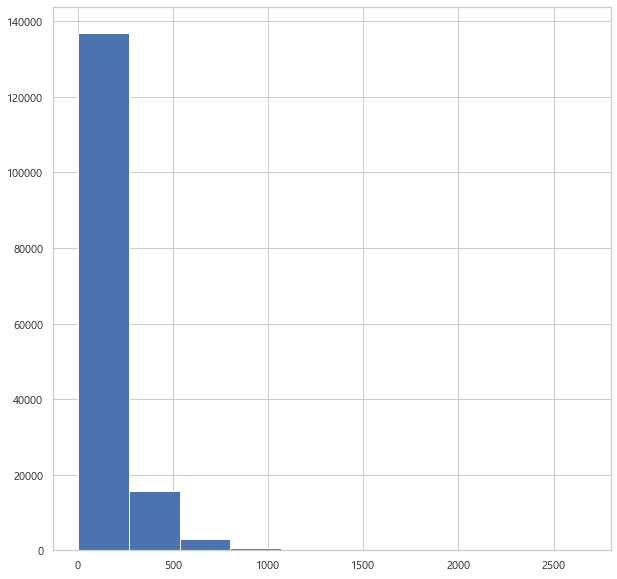

In [9]:
plt.hist(cj_data.TRANSIT_COUNT)
plt.show()

In [10]:
# datetime 자료형을 일시적으로 string으로 변환
cj_data.DATE = cj_data.DATE.astype('str')

In [11]:
cj_data_YM = pd.DataFrame.copy(cj_data)

In [12]:
cj_data_YM.YEAR= cj_data_YM.YEAR.astype('str')
cj_data_YM.MONTH= cj_data_YM.MONTH.astype('str')

In [13]:
cj_data_YM['YM']= cj_data_YM.YEAR + cj_data_YM.MONTH

In [14]:
cj_groupby= cj_data_YM.groupby(['YM','GU_CODE'])
cj_groupby_cnt_data= cj_groupby.count().unstack()['TRANSIT_COUNT']

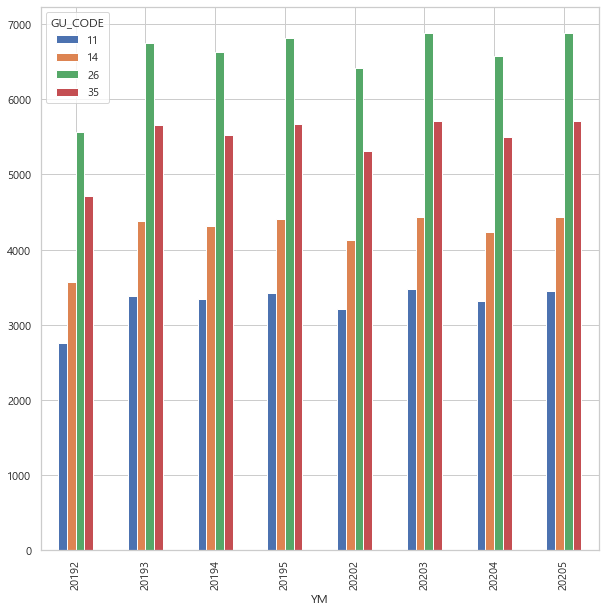

In [15]:
# YEAR, MONTH별 구 별 TRANSIT_COUNT의 분포
cj_groupby_cnt_data.plot.bar()
plt.show()

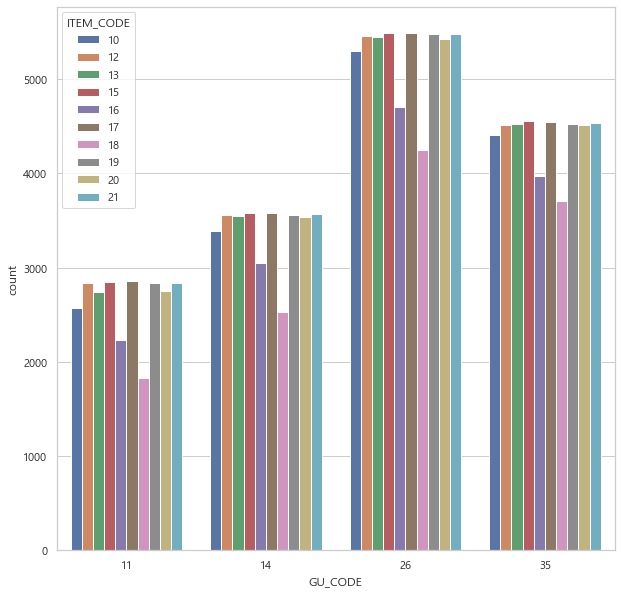

In [18]:
# 구 별 ITEM_CODE 분포
sns.countplot(x= 'GU_CODE',hue= 'ITEM_CODE',data= cj_data, orient= 'h')
plt.show()

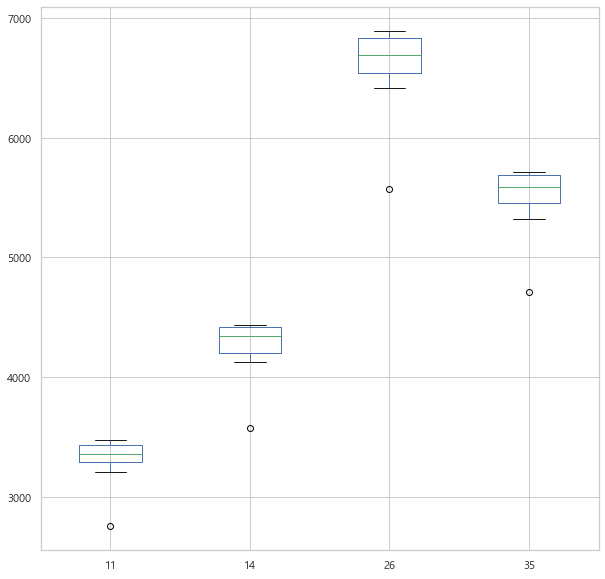

In [16]:
# 구별 transit_count boxplot
cj_groupby_cnt_data.plot.box()
plt.show()

# SH_DATA

## SH_RESIDENT_DATA

In [17]:
sh_resident_gb= sh_resident_data.groupby(['SEX','AGE'])

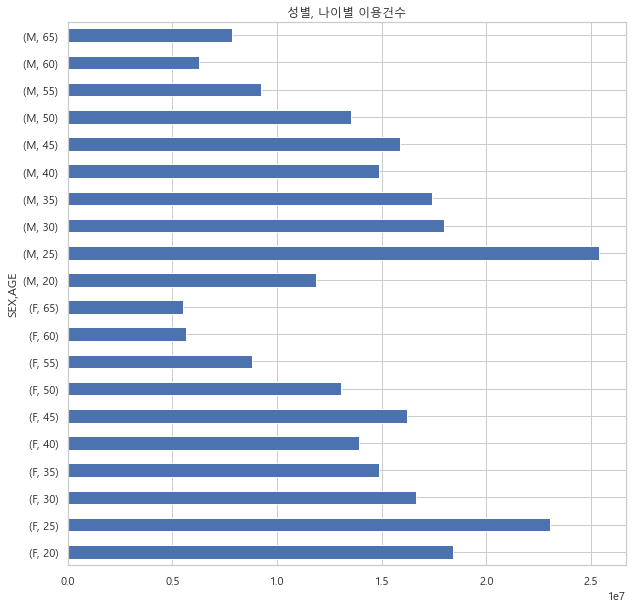

In [19]:
sh_resident_gb.sum()['USE_CNT'].plot.barh()
plt.title('성별, 나이별 이용건수')
plt.show()

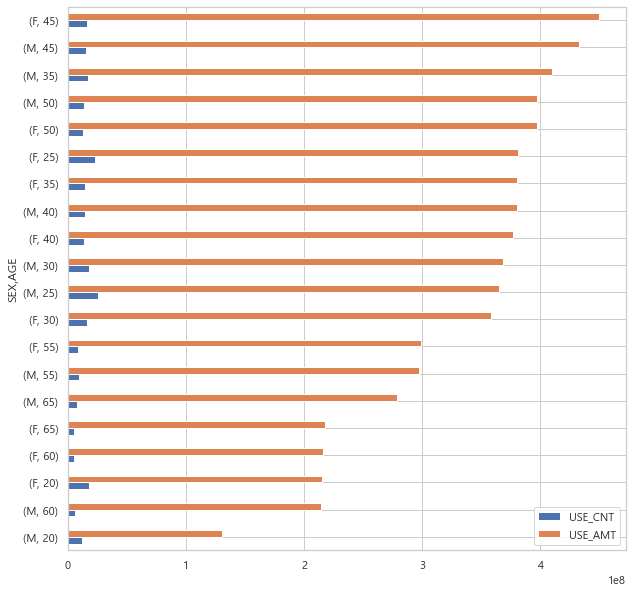

In [20]:
sh_resident_gb.sum()[['USE_CNT','USE_AMT']].sort_values(by= 'USE_AMT').plot.barh()
plt.show()

## SH_FOREIGN_DATA

In [17]:
sh_foreign_data.columns

Index(['DATE', 'YEAR', 'MONTH', 'DAY', 'GU_CODE', 'DONG_CODE', 'INDUSTRY_CODE',
       'COUNTRY_NM', 'USE_CNT', 'USE_AMT', 'SI_CODE', 'TOTAL_CODE'],
      dtype='object')

In [18]:
sh_foreign_gb= sh_foreign_data.groupby('COUNTRY_NM')

In [19]:
sh_foreign_gb.sum()['USE_CNT'].fillna(0)

COUNTRY_NM
네덜란드           388
대만          289472
독일            3268
러시아           1480
미국         1275751
미주          195877
베트남          49307
스웨덴           1437
싱가폴         151221
아시아         231721
영국          145957
오스트레일리아       1289
유럽          384456
일본         1548160
정보없음           988
중국         1416379
중동/아프리카      69381
카자흐스탄         1887
캐나다           1640
태국          137953
프랑스           3142
필리핀          89032
홍콩          167739
Name: USE_CNT, dtype: int64

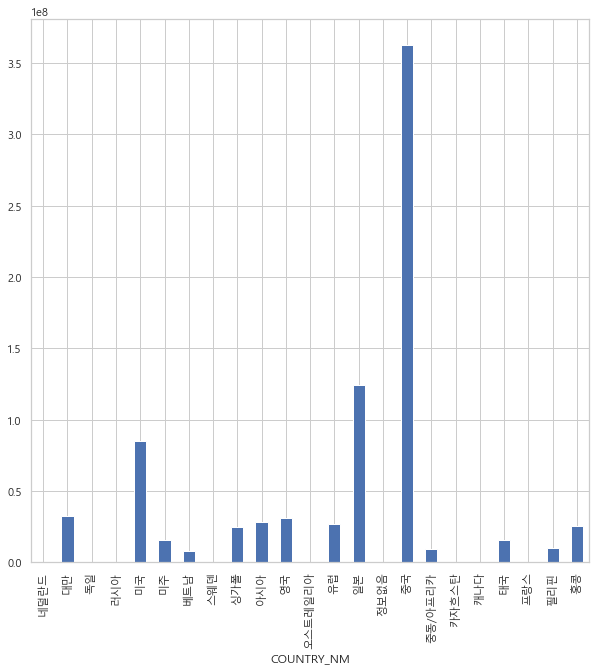

In [20]:
sh_foreign_gb.sum()['USE_AMT'].fillna(0).plot.bar()
plt.show()

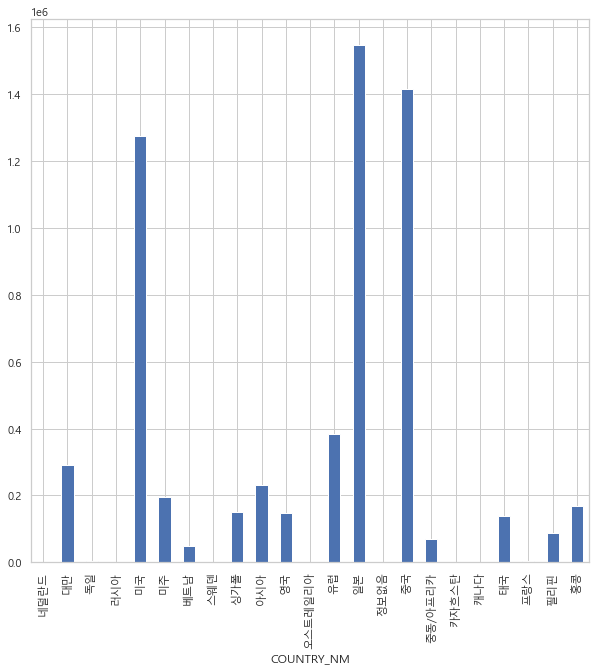

In [21]:
sh_foreign_gb.sum()['USE_CNT'].fillna(0).plot.bar()
plt.show()

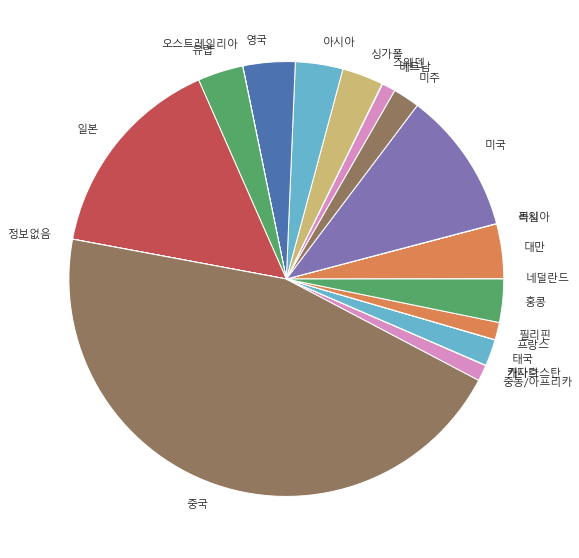

In [22]:
plt.pie(sh_foreign_gb.sum()['USE_AMT'], labels= sh_foreign_gb.sum()['USE_AMT'].index)
plt.show()

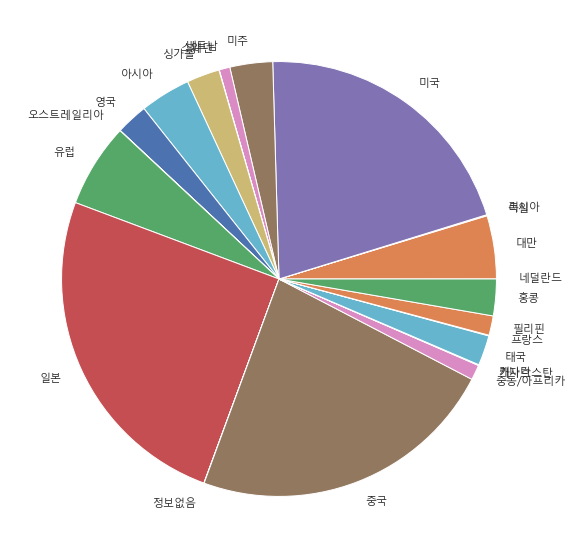

In [23]:
plt.pie(sh_foreign_gb.sum()['USE_CNT'], labels= sh_foreign_gb.sum()['USE_AMT'].index)
plt.show()

In [21]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.width', 1000)

# Merge Data

In [26]:
# DATA groupby
sh_gb_date= sh_resident_data.groupby(['YEAR','MONTH'])
cj_gb_date= cj_data.groupby(['YEAR','MONTH'])

In [27]:
sh_gb_date_sum= sh_gb_date.sum()[['USE_CNT','USE_AMT']]
sh_gb_date_sum= sh_gb_date_sum.assign(USE_MEAN= lambda x: x.USE_AMT/x.USE_CNT)

In [34]:
cj_gb_date_sum= cj_gb_date.sum()['TRANSIT_COUNT']

In [35]:
cj_gb_date_sum

YEAR  MONTH
2019  2        1627147.0
      3        1977310.0
      4        2010280.0
      5        2048914.0
2020  2        2348916.0
      3        2764249.0
      4        2438587.0
      5        2610071.0
Name: TRANSIT_COUNT, dtype: float32

In [36]:
sh_cj_date= pd.merge(sh_gb_date_sum, cj_gb_date.sum()['TRANSIT_COUNT'], how= 'left', on= ['YEAR','MONTH'])

In [37]:
sh_cj_date

USE_CNT    USE_AMT   USE_MEAN  TRANSIT_COUNT
YEAR MONTH                                               
2019 2      32250975  815371053  25.282059      1627147.0
     3      38573668  933075474  24.189441      1977310.0
     4      39261566  904356231  23.034135      2010280.0
     5      41387670  956527361  23.111409      2048914.0
2020 2      29559112  707505641  23.935281      2348916.0
     3      28242395  636354916  22.531903      2764249.0
     4      30481991  707339938  23.205175      2438587.0
     5      36582173  902985435  24.683756      2610071.0

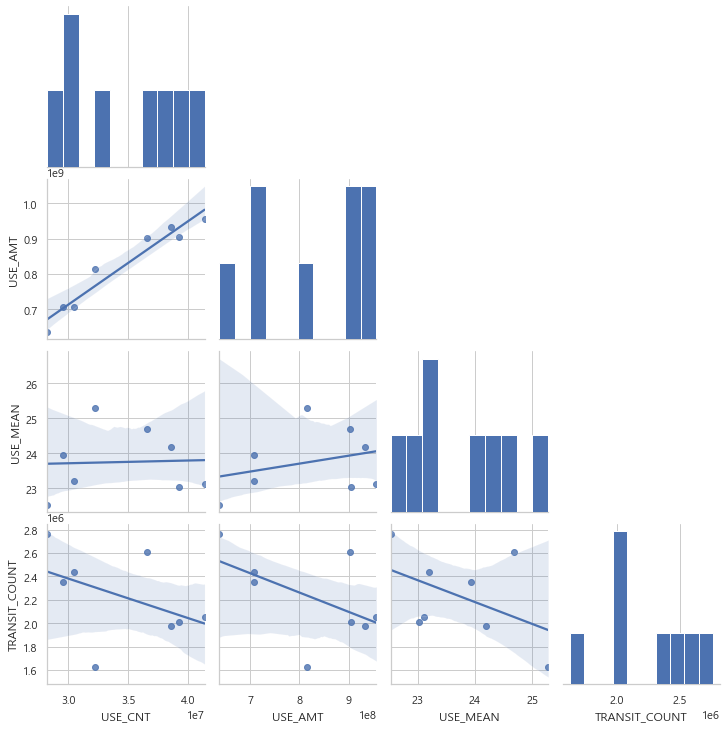

In [38]:
sns.pairplot(sh_cj_date, corner=True, kind= 'reg')
plt.show()

In [84]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(np.array(sh_cj_date.iloc[:,2]).reshape(-1,1), np.array(sh_cj_date.iloc[:,3]).reshape(-1,1))

LinearRegression()

In [107]:
# 회귀계수
print("기울기: ",lm.coef_)
print("절편: ",lm.intercept_)

기울기:  [[-12603.62316268]]
절편:  [372360.47043905]


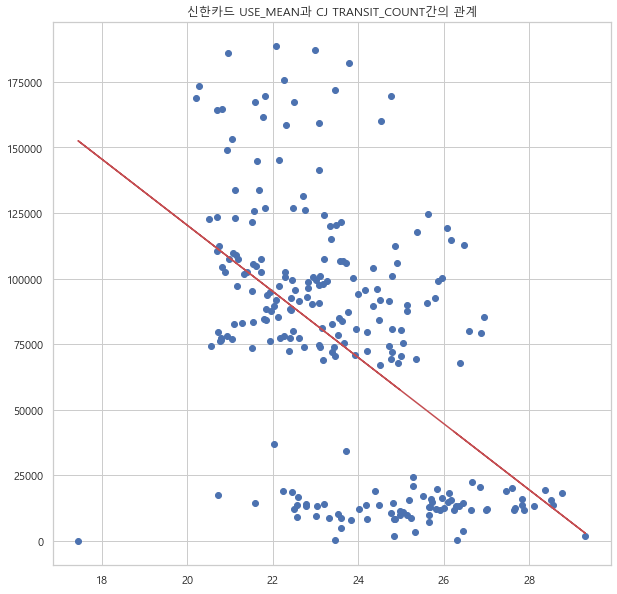

In [106]:
plt.scatter(sh_cj_date.iloc[:,2], sh_cj_date.iloc[:,3])
plt.plot(sh_cj_date.iloc[:,2], sh_cj_date.iloc[:,2]*slope + intercept, 'r')
plt.title('신한카드 USE_MEAN과 CJ TRANSIT_COUNT간의 관계')
plt.show()

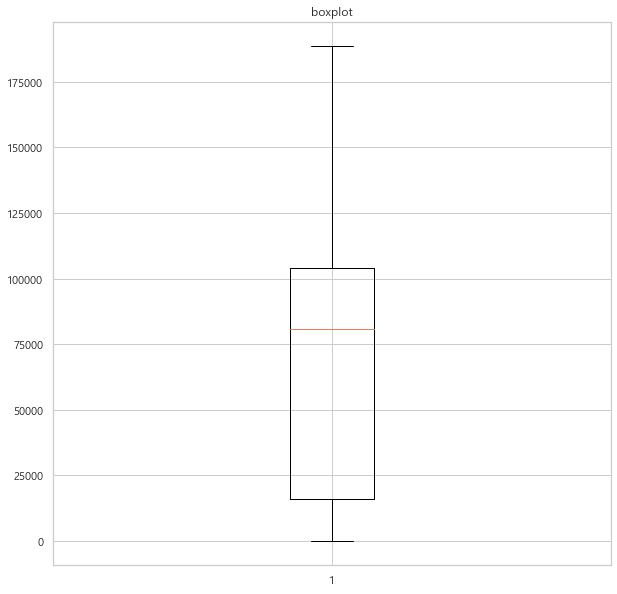

In [111]:
plt.boxplot(sh_cj_date.iloc[:,3])
plt.title('boxplot')
plt.show()

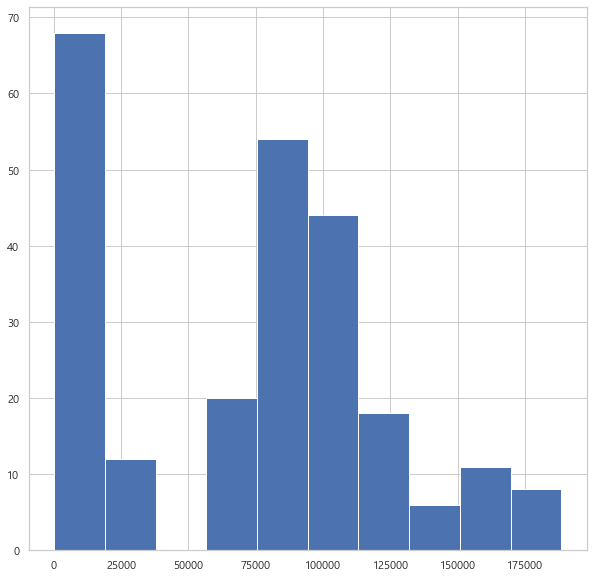

In [112]:
# 히스토그램 분포
plt.hist(sh_cj_date.iloc[:,3])
plt.show()

# 할것
- 다른 변수들에 대해 Groupby한 후 Merge하여 관계도 그려보기
- 상관계수 / 업종별 / 시간별로 쪼개고 merge하여 분석하기